RANDOM FOREST

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/diabetes (1).csv')

In [ ]:
# Clean column names
df.columns = df.columns.str.strip()

# Create target label from HbA1c (glyhb)
df["Outcome"] = (df["glyhb"] >= 6.5).astype(int)

# Features and label
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

print(df["Outcome"].value_counts())


Outcome
0    338
1     65
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---- FIX CATEGORICAL ISSUE ----
cat_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
# --------------------------------

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# RandomForest model
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

# Train
rf.fit(X_train, y_train)

# Predictions
pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))


Accuracy: 0.9753086419753086

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        68
           1       1.00      0.85      0.92        13

    accuracy                           0.98        81
   macro avg       0.99      0.92      0.95        81
weighted avg       0.98      0.98      0.97        81


Confusion Matrix:
 [[68  0]
 [ 2 11]]


In [ ]:
rf.fit(X_train, y_train)
pred = rf.predict(X_test)


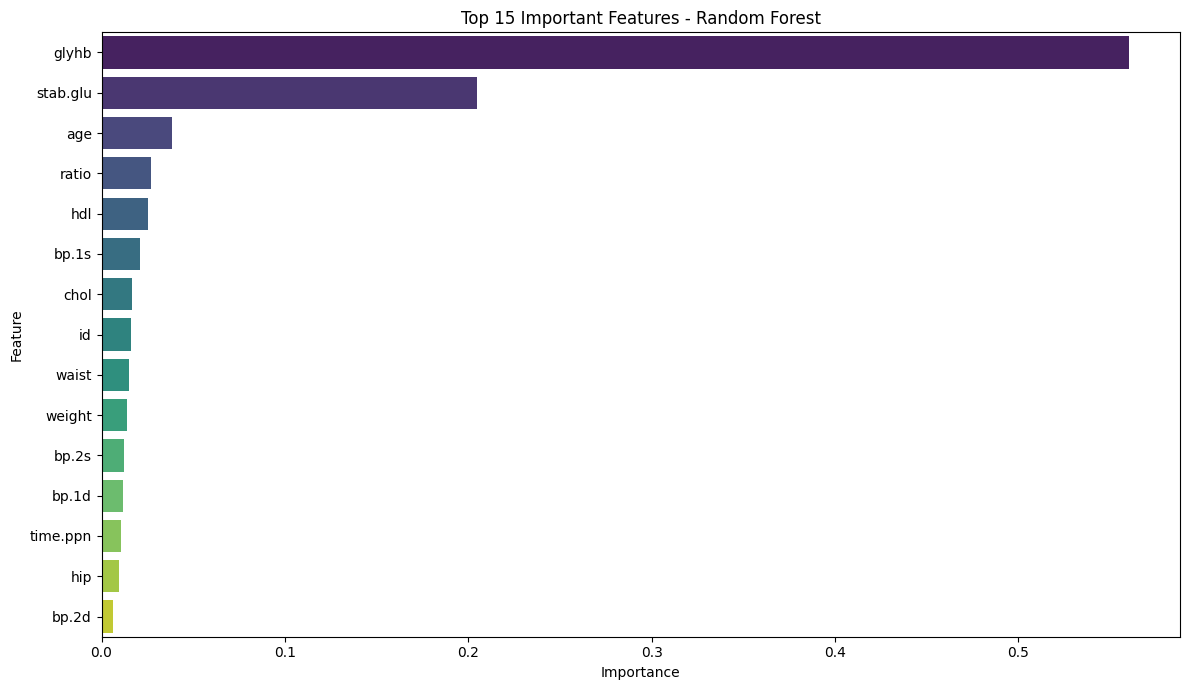

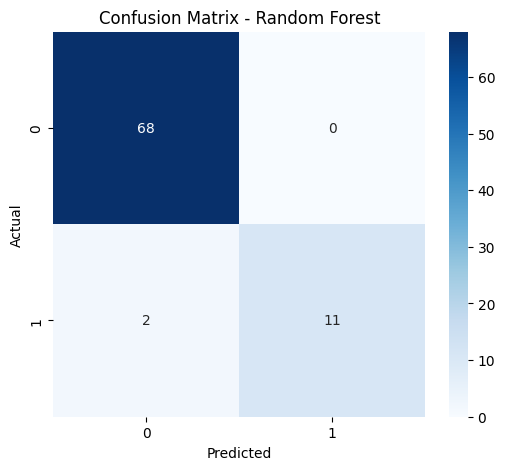

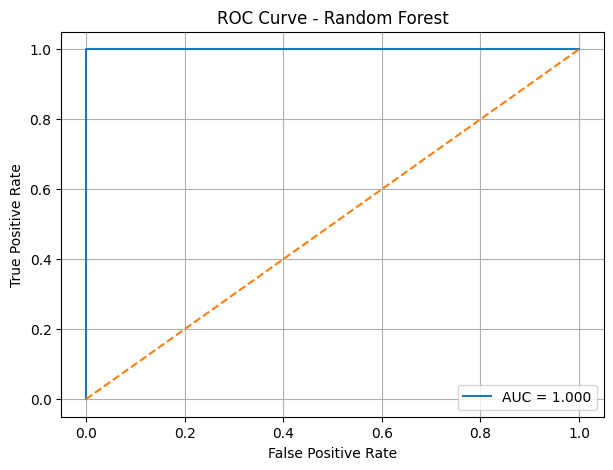

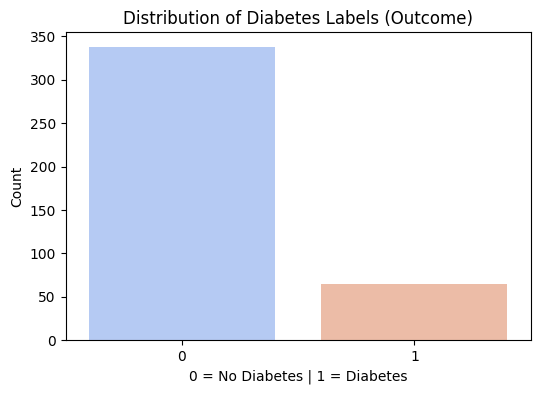

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# ======================
# 1. FEATURE IMPORTANCE
# ======================
plt.figure(figsize=(12, 7))
importances = rf.feature_importances_

# Match importance back to column names
feature_names = X.columns

# Sort importance
indices = importances.argsort()[::-1]

sns.barplot(
    x=importances[indices][:15],        # Top 15 features
    y=feature_names[indices][:15],
    palette="viridis"
)
plt.title("Top 15 Important Features - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# ======================
# 2. CONFUSION MATRIX
# ======================
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ======================
# 3. ROC CURVE
# ======================
probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], '--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# ======================
# 4. OUTCOME DISTRIBUTION PLOT
# ======================
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="coolwarm")
plt.title("Distribution of Diabetes Labels (Outcome)")
plt.xlabel("0 = No Diabetes | 1 = Diabetes")
plt.ylabel("Count")
plt.show()


XGBoost Model

In [ ]:
!pip install --upgrade xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 8.1 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.1.1
    Uninstalling xgboost-3.1.1:
      Successfully uninstalled xgboost-3.1.1


In [ ]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Optimized XGBoost model (compatible with older versions)
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.75,
    colsample_bytree=0.8,
    gamma=0.3,
    reg_alpha=0.2,
    reg_lambda=1.0,
    min_child_weight=2,
    eval_metric='logloss',   # required for older versions
    random_state=42
)


In [ ]:
# Train normally (no early stopping)
xgb.fit(X_train, y_train)

# Prediction
pred = xgb.predict(X_test)

# Evaluation
print("🔥 XGBoost Accuracy:", accuracy_score(y_test, pred))
print("\n📌 Classification Report:\n", classification_report(y_test, pred))
print("\n📌 Confusion Matrix:\n", confusion_matrix(y_test, pred))


🔥 XGBoost Accuracy: 0.9753086419753086

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        68
           1       1.00      0.85      0.92        13

    accuracy                           0.98        81
   macro avg       0.99      0.92      0.95        81
weighted avg       0.98      0.98      0.97        81


📌 Confusion Matrix:
 [[68  0]
 [ 2 11]]


VISUALIZATIONS FOR XGBoost

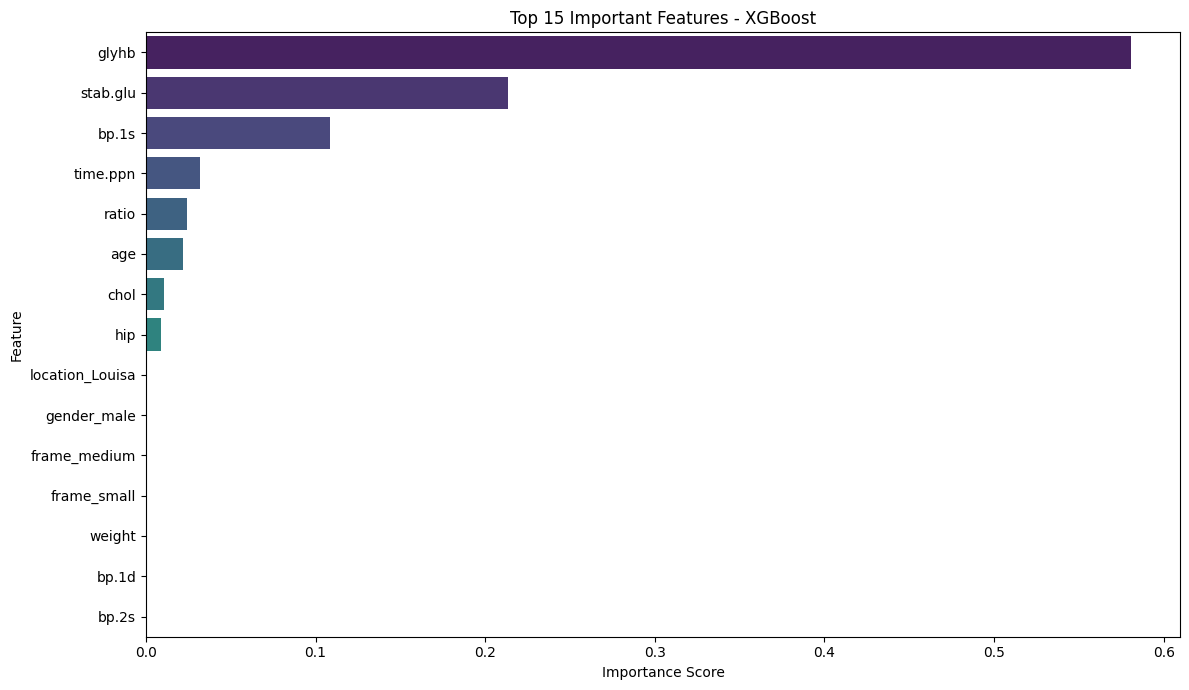

In [ ]:
# 1. FEATURE IMPORTANCE PLOT
# ============================

plt.figure(figsize=(12, 7))
importances = xgb.feature_importances_
feature_names = X.columns

# Sort features
indices = importances.argsort()[::-1]

sns.barplot(
    x=importances[indices][:15],         # Top 15 important features
    y=feature_names[indices][:15],
    palette="viridis"
)

plt.title("Top 15 Important Features - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


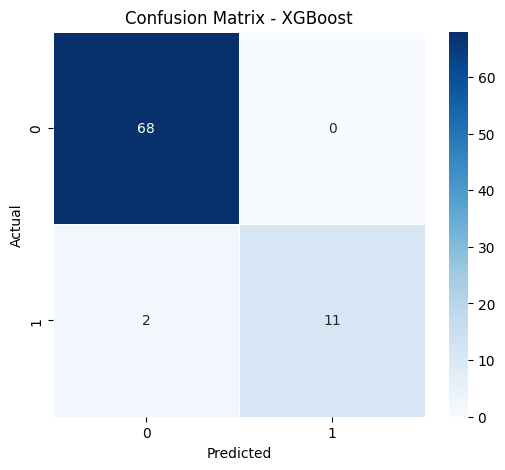

In [ ]:
# 2. CONFUSION MATRIX HEATMAP
# ============================

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", linewidths=.5)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

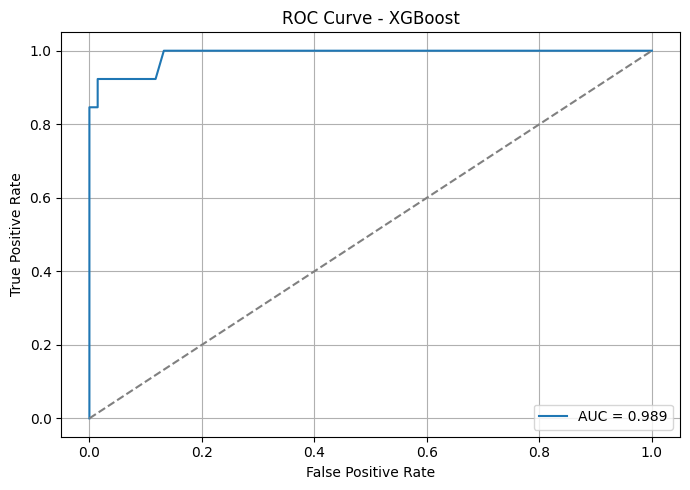

In [ ]:
# 3. ROC CURVE
# ============================

probs = xgb.predict_proba(X_test)[:, 1]  # Probability of class 1

fpr, tpr, thresholds = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


SVM MODEL

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df.isna().sum()


,0
id,0
chol,1
stab.glu,0
hdl,1
ratio,1
glyhb,13
location,0
age,0
gender,0
height,5


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# Identify column types
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64','float64']).columns

# Impute categorical only if they exist
if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# Impute numeric only if they exist
if len(num_cols) > 0:
    num_imputer = SimpleImputer(strategy='mean')
    X[num_cols] = num_imputer.fit_transform(X[num_cols])

In [ ]:
# 7. Encode categorical
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 9. Scale features (SVM requires scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 10. SVM Model
svm = SVC(
    kernel='rbf',
    C=2,
    gamma='scale',
    probability=True,
    random_state=42
)

# 11. Train
svm.fit(X_train, y_train)

# 12. Predict
pred = svm.predict(X_test)

# 13. Output
print("🔥 SVM Accuracy:", accuracy_score(y_test, pred))
print("\n📌 Classification Report:\n", classification_report(y_test, pred))
print("\n📌 Confusion Matrix:\n", confusion_matrix(y_test, pred))

🔥 SVM Accuracy: 0.9382716049382716

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        68
           1       1.00      0.62      0.76        13

    accuracy                           0.94        81
   macro avg       0.97      0.81      0.86        81
weighted avg       0.94      0.94      0.93        81


📌 Confusion Matrix:
 [[68  0]
 [ 5  8]]


In [ ]:
pred = svm.predict(X_test)
probs = svm.predict_proba(X_test)[:, 1]

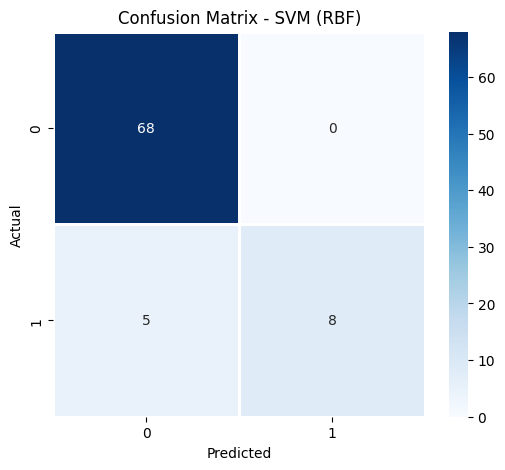

In [ ]:
# 1. CONFUSION MATRIX HEATMAP
# ==================================================
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.title("Confusion Matrix - SVM (RBF)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


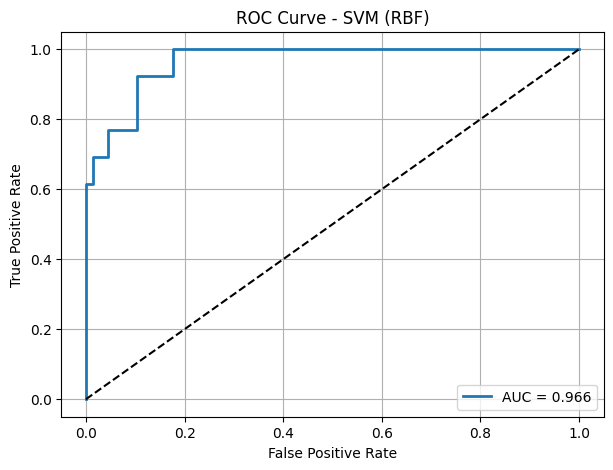

In [ ]:
# 2. ROC CURVE + AUC
# ==================================================
probs = svm.predict_proba(X_test)[:, 1]   # Probability for class 1

fpr, tpr, thresholds = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}", linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - SVM (RBF)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



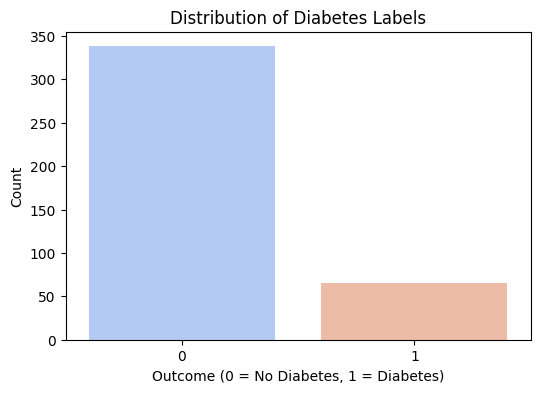

In [ ]:
# 3. OUTCOME DISTRIBUTION
# ==================================================
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="coolwarm")
plt.title("Distribution of Diabetes Labels")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()

LIGHTBGM MODEL

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# OPTIMIZED LIGHTGBM MODEL
# ==========================================

lgb = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.03,
    num_leaves=31,
    max_depth=-1,             # Let LightGBM choose best depth
    min_child_samples=30,     # Prevents overfitting
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,            # L1 regularization
    reg_lambda=0.3,           # L2 regularization
    random_state=42
)


In [ ]:
# Train model
lgb.fit(X_train, y_train)

# Predict
pred = lgb.predict(X_test)

# Evaluation
print("🔥 LightGBM Accuracy:", accuracy_score(y_test, pred))
print("\n📌 Classification Report:\n", classification_report(y_test, pred))
print("\n📌 Confusion Matrix:\n", confusion_matrix(y_test, pred))

[LightGBM] [Info] Number of positive: 52, number of negative: 270
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 322, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161491 -> initscore=-1.647178
[LightGBM] [Info] Start training from score -1.647178
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
pred = lgb.predict(X_test)

In [ ]:
probs = lgb.predict_proba(X_test)[:, 1]


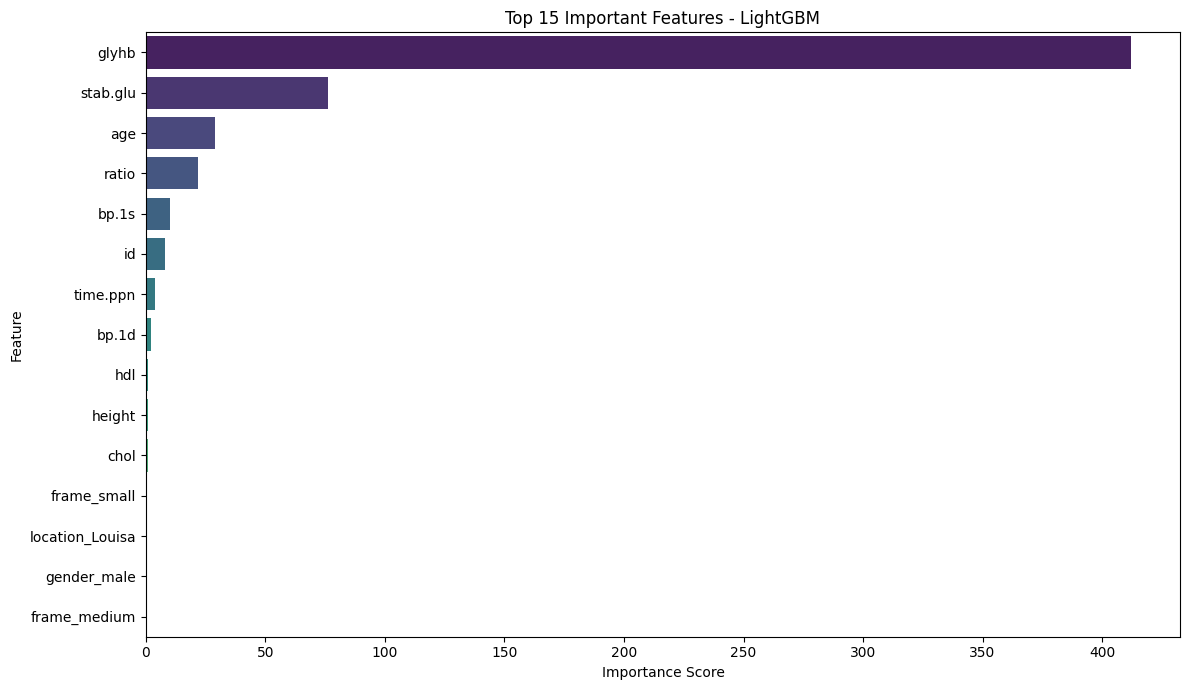

In [ ]:
# 1. FEATURE IMPORTANCE (Top 15 Features)
# ==========================================

plt.figure(figsize=(12, 7))
importances = lgb.feature_importances_
feature_names = X.columns

# Sort by importance
indices = importances.argsort()[::-1]

sns.barplot(
    x=importances[indices][:15],
    y=feature_names[indices][:15],
    palette="viridis"
)

plt.title("Top 15 Important Features - LightGBM")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



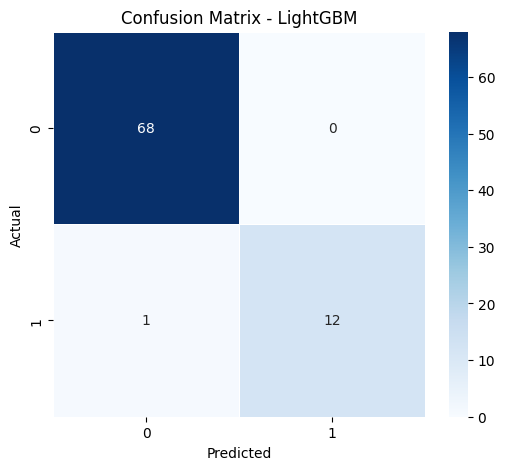

In [ ]:
# 2. CONFUSION MATRIX HEATMAP
# ==========================================

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

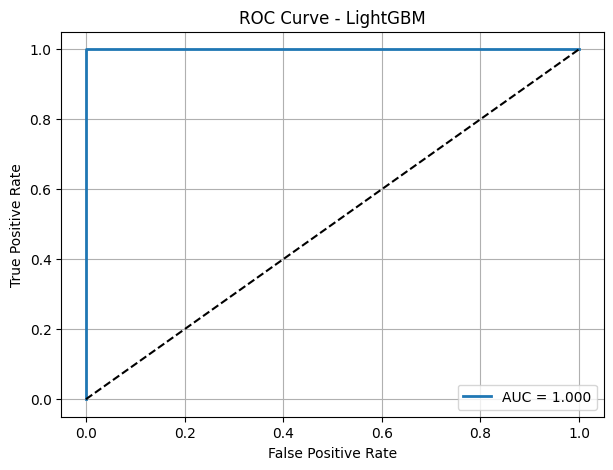

In [ ]:
 #3. ROC CURVE + AUC SCORE


probs = lgb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}", linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - LightGBM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

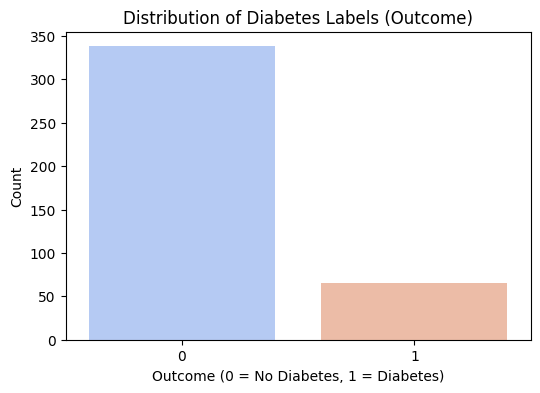

In [ ]:
# 4. OUTCOME DISTRIBUTION
# ==========================================

plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="coolwarm")
plt.title("Distribution of Diabetes Labels (Outcome)")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()

LINEAR REGRESSION

In [69]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [79]:
leakage_cols_to_remove = ['glyhb', 'ratio', 'stab.glu', 'Outcome']
X = X.drop(columns=[col for col in leakage_cols_to_remove if col in X.columns])

print(f"Columns remaining in X: {X.columns.tolist()}")

Columns remaining in X: ['chol', 'hdl', 'age', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'waist', 'hip', 'time.ppn']


In [81]:
y = df['diabetes']

# Define columns to drop, ensuring 'Outcome' is included for consistency
columns_to_drop = ['id', 'location', 'gender', 'glyhb', 'ratio', 'stab.glu', 'Outcome']

# Drop columns from df to create X
X = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

print(f"New shape of X: {X.shape}")
print(f"New columns in X: {X.columns.tolist()}")
print(f"Shape of y: {y.shape}")

New shape of X: (403, 12)
New columns in X: ['chol', 'hdl', 'age', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'waist', 'hip', 'time.ppn', 'diabetes']
Shape of y: (403,)


In [82]:
y = df['diabetes']

# Define columns to drop, ensuring 'Outcome' and 'diabetes' are included for consistency and to prevent leakage
columns_to_drop = ['id', 'location', 'gender', 'glyhb', 'ratio', 'stab.glu', 'Outcome', 'diabetes']

# Drop columns from df to create X, ensuring only existing columns are dropped
X = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

print(f"New shape of X: {X.shape}")
print(f"New columns in X: {X.columns.tolist()}")
print(f"Shape of y: {y.shape}")

New shape of X: (403, 11)
New columns in X: ['chol', 'hdl', 'age', 'height', 'weight', 'frame', 'bp.1s', 'bp.1d', 'waist', 'hip', 'time.ppn']
Shape of y: (403,)


In [83]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Print the identified columns to verify
print(f"Categorical columns: {list(categorical_cols)}")
print(f"Numerical columns: {list(numerical_cols)}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Categorical columns: ['frame']
Numerical columns: ['chol', 'hdl', 'age', 'height', 'weight', 'bp.1s', 'bp.1d', 'waist', 'hip', 'time.ppn']
X_train shape: (322, 11)
X_test shape: (81, 11)
y_train shape: (322,)
y_test shape: (81,)


In [84]:
from sklearn.impute import SimpleImputer

# Impute missing values in numerical columns using median strategy
median_imputer = SimpleImputer(strategy='median')
X_train_num_imputed = median_imputer.fit_transform(X_train[numerical_cols])
X_test_num_imputed = median_imputer.transform(X_test[numerical_cols])

# Scale numerical features
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num_imputed)
X_test_num_scaled = scaler.transform(X_test_num_imputed)

print("Numerical features imputed and scaled successfully for training and testing sets.")
print(f"Shape of X_train_num_scaled: {X_train_num_scaled.shape}")
print(f"Shape of X_test_num_scaled: {X_test_num_scaled.shape}")

Numerical features imputed and scaled successfully for training and testing sets.
Shape of X_train_num_scaled: (322, 10)
Shape of X_test_num_scaled: (81, 10)


In [85]:
from sklearn.preprocessing import OneHotEncoder

# Handle categorical features
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat_encoded = onehot_encoder.fit_transform(X_train[categorical_cols])
X_test_cat_encoded = onehot_encoder.transform(X_test[categorical_cols])

print("Categorical features one-hot encoded successfully for training and testing sets.")
print(f"Shape of X_train_cat_encoded: {X_train_cat_encoded.shape}")
print(f"Shape of X_test_cat_encoded: {X_test_cat_encoded.shape}")

Categorical features one-hot encoded successfully for training and testing sets.
Shape of X_train_cat_encoded: (322, 3)
Shape of X_test_cat_encoded: (81, 3)


In [86]:
X_train_processed = np.hstack((X_train_num_scaled, X_train_cat_encoded))
X_test_processed = np.hstack((X_test_num_scaled, X_test_cat_encoded))

print(f"Shape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")

Shape of X_train_processed: (322, 13)
Shape of X_test_processed: (81, 13)


In [87]:
logistic_model = LogisticRegression(solver='liblinear', random_state=42)
logistic_model.fit(X_train_processed, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [88]:
y_pred = logistic_model.predict(X_test_processed)
print("Predictions made successfully on the test set.")

Predictions made successfully on the test set.


In [89]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8024691358024691

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88        68
           1       0.36      0.31      0.33        13

    accuracy                           0.80        81
   macro avg       0.62      0.60      0.61        81
weighted avg       0.79      0.80      0.80        81


Confusion Matrix:
 [[61  7]
 [ 9  4]]


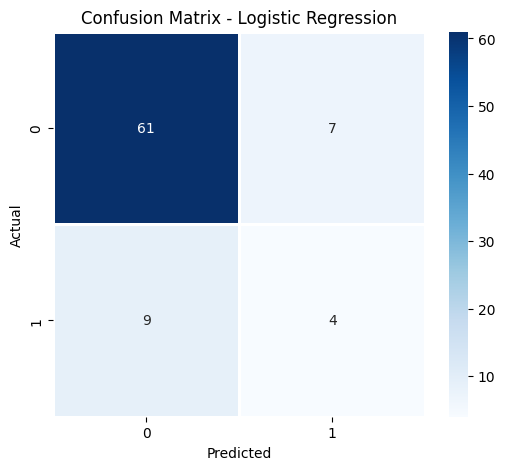

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# 1. CONFUSION MATRIX HEATMAP
# ==================================================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

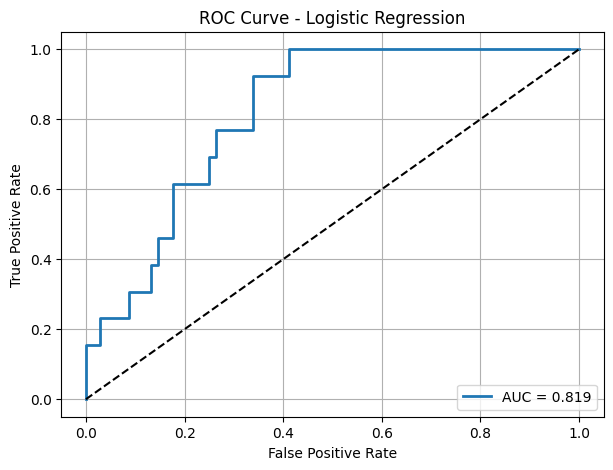

In [91]:
probs = logistic_model.predict_proba(X_test_processed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}", linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [92]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Impute missing values in categorical columns using most frequent strategy
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat_imputed = cat_imputer.fit_transform(X_train[categorical_cols])
X_test_cat_imputed = cat_imputer.transform(X_test[categorical_cols])

print("Categorical features imputed successfully for training and testing sets.")

# One-hot encode categorical features
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat_encoded = onehot_encoder.fit_transform(X_train_cat_imputed)
X_test_cat_encoded = onehot_encoder.transform(X_test_cat_imputed)

print("Categorical features one-hot encoded successfully for training and testing sets.")
print(f"Shape of X_train_cat_encoded: {X_train_cat_encoded.shape}")
print(f"Shape of X_test_cat_encoded: {X_test_cat_encoded.shape}")

Categorical features imputed successfully for training and testing sets.
Categorical features one-hot encoded successfully for training and testing sets.
Shape of X_train_cat_encoded: (322, 3)
Shape of X_test_cat_encoded: (81, 3)


In [93]:
X_train_processed = np.hstack((X_train_num_scaled, X_train_cat_encoded))
X_test_processed = np.hstack((X_test_num_scaled, X_test_cat_encoded))

print(f"Shape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")

Shape of X_train_processed: (322, 13)
Shape of X_test_processed: (81, 13)


In [94]:
logistic_model = LogisticRegression(class_weight='balanced', solver='liblinear', C=0.3, random_state=42)
logistic_model.fit(X_train_processed, y_train)

print("Logistic Regression model trained successfully with balanced class weights and C=0.3.")

Logistic Regression model trained successfully with balanced class weights and C=0.3.


In [95]:
y_pred = logistic_model.predict(X_test_processed)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7160493827160493

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.80        68
           1       0.34      0.85      0.49        13

    accuracy                           0.72        81
   macro avg       0.65      0.77      0.65        81
weighted avg       0.86      0.72      0.75        81


Confusion Matrix:
 [[47 21]
 [ 2 11]]


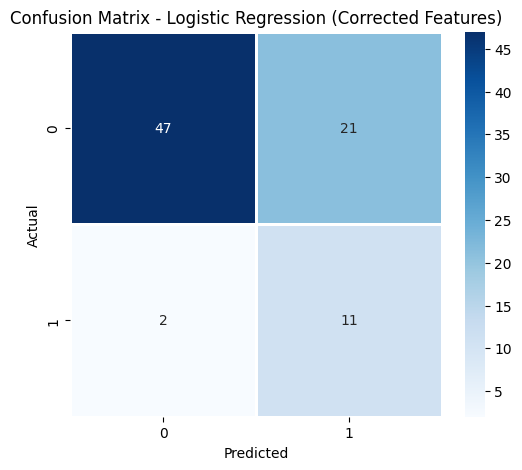

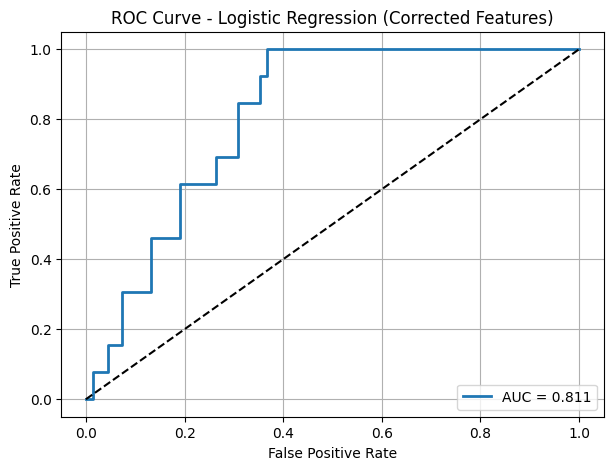

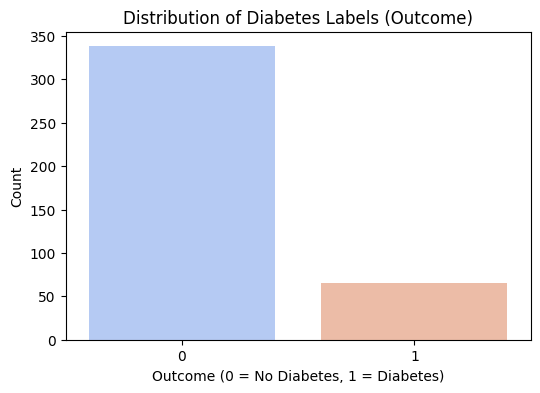

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# 1. CONFUSION MATRIX HEATMAP
# ==================================================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1)
plt.title("Confusion Matrix - Logistic Regression (Corrected Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. ROC CURVE + AUC
# ==================================================
probs = logistic_model.predict_proba(X_test_processed)[:, 1]   # Probability for class 1

fpr, tpr, thresholds = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}", linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - Logistic Regression (Corrected Features)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 3. OUTCOME DISTRIBUTION
# ==================================================
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="coolwarm")
plt.title("Distribution of Diabetes Labels (Outcome)")
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()